# Deep Learning
Inteligencia artifical deriva a Machine Learning y esta, deriva a deep learning.
### Machine Learning:
Se aplica el feature enginiering lo cual significa aplicar todos los conocimientos del negocio para hacer el minado de datos.

### Deep Learning:
Es una caja negra porque solamente se cuadra como van a entrar los datos en la red neuronal y la misma red se encarga de hacer el feature engineering

### Ventajas:

### Desventajas:
- Overfitting: Memoriza los datos y olvida generalizar los patrones.
- Cajas negras:

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

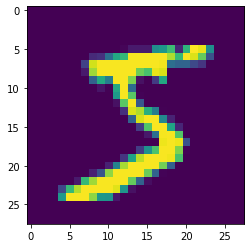

In [3]:
plt.imshow(train_data[0])

In [4]:
train_labels[0]

5

In [5]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [6]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics='accuracy')

## Se aplica un reshape:
Es importante entender como estan compuestos los datos de entrada de la red neuronal, debido a que los datos en brupo pueden estar representados en dimensiones confusas para el modelo.

En este caso, los datos de entrada son pixeles de 28 x 28, pero inicialmente se encuentran guardados en 28 vectores cada uno con un una largo de 28 items.

una imagen no puede ser comprendida como 28 listas independientes, por tanto, el modelo debe recibir una unica lista de 28*28 elementos.

El total de imagenes son 60 mil

In [7]:
train_data.shape

(60000, 28, 28)

In [8]:
x_train = train_data.reshape(60000,28*28)
x_test = test_data.reshape(10000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
model.fit(x_train,y_train,epochs=5,batch_size = 128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2533 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1031 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0365 - accuracy: 0.9891


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9812


[0.06444822996854782, 0.9811999797821045]

### Neurona es un Perceptron

- Entradas: Son las caracteristicas del problema que van a entrar en el modelo
- Pesos de la neurona para cada caracteristica de entrada, esos pesos cambian iterativamente para poder resolver el problema.
- Sumas ponderadas: La salida de esta suma ponderada es una operación lineal
- Se le da elasticidad al modelo con un Bias a la ecuación lineal de cada neurona

### La función de activación: 
Deforma la respuesta obtenida por la suma ponderada de la neurona, ejemplo, si el valor es menor a 0 coloca 1 si es mayor a cero coloca 0.
Ahora, la decisión de un resultado esta acompañada de un condicional que evalua el resultado de la capa y cada una de las entradas en la neurona. 
- Esta el condicional AND y el condicional OR.
- Tiene un problema, y es que solo el condicional de la operación lineal es incompleto, se necesita mas de una recta lineal, por eso se agregan mas neuronas


### Arquitectura de las Redes neuronales
- Capa inicial: Capa de entrada, es la capa input, que recibe todos los datos
- Capas Ocultas: Procesan la información y procesan la información sacando caracteristicas de los datos
- Capa de Salida: sacan la información de la decisión y procesamiento de las capas ocultas. 

Cada capa transfiere de manera secuencial información a la siguiente capa para continuar con el procesamiento de los datos.

Entonces tenemos los datos de entrada, el cual se puede llamar como un vector de caracteristicas, el cual se encuentra con los pesos dados por cada una de las neuronas dentro de las capas.

La operación es un producto punto de una matriz (Pesos de cada neurona de la capa) con un vector el cual son las variables de entrada.

No importa cuantas operaciones lineales apiles en la red neuronal, si no se hace nada con esto siempre la salida sera un resultado lineal.

## Funciones de activación: 
Deforman los resultados lineales
### Discretas: 
Funcionan con valores definidos enteros, como 1, 2, 3 ó 0.

### Continuas:
Se pueden tomar valores infinitesimales

#### Función Escalonada / Umbral / Threshold
Toma los valores de entrada y cuando se encuentran debajo de un umbral se le asigna un resultado numerico Discreto y cuando es mayor será entonces otro resultado.

#### Singno / signum
Función parecida a la escalonada pero su dominio es de -1 a 1 

#### Función Sigmoidal / Sigmoid:
Su rando es de cero a uno es decir, sus resultados van de cero a 1. pero se apilan mucho los valores

#### Función tangente hiperbolica / tanh
Permite dirigir los resultados de -1 a 1. 

#### Función Relu

No es una función lineal, si un valor es inferior a cero siempre va a colocar cero, pero si es mayor a cero, siempre va a ir a cer, es la mas usada para trabajar en capas ocultas.

#### Función Softmax. 
su ejecución funciona para clasificación binaria y multiple.

In [12]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                       cov=0.1,
                       n_samples = N,
                       n_features = 2,
                       n_classes = 2,
                       shuffle = True,
                       random_state=None)

In [13]:
X, Y = gaussian_quantiles
X.shape

(1000, 2)

In [14]:
Y.shape

(1000,)

### Configuración de la estructura de datos.
A continuación se evidencia la necesidad de aplicar un reshape a la estructura de los datos de Y, que es la variable de salida para que pueda ser utilzada en la red neuronal, esto porque no tiene un axis si no que actualmente se presenta como una lista plata. El modelo de red neuronal adminet valores con axis para identificar el tamaño de salida de la variable. 

In [15]:
Y = Y[:,np.newaxis]

In [16]:
Y.shape

(1000, 1)

#### Se grafica los datos.
Para graficar los datos es necesario graficar las dos variables de X que estructuran los datos en un plano.

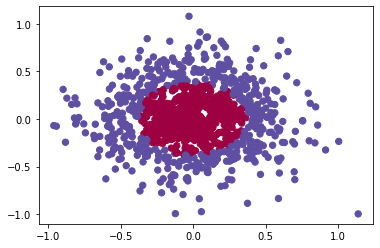

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)
plt.show()

## Funciones de activación

In [18]:
def sigmoid(x,derivate= False):
    if derivate:
        return np.exp(-x)/((np.exp(-x) + 1)**2)
    else: 
        return 1 / (1+np.exp(-x))
    
def relu(x,derivate=False):
    if derivate:
        # Cambia todos los valores de X y los retorna
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

## Función de perdida
La función que mide el desempeño del modelo y es la que se debe optimizar.

In [19]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat-y)
    else:
        return np.mean((y_hat-y)**2)

## Crear la estructura de la red neuronal
Se deben definir la estructura de las neuronal, como el peso y el bias.

In [20]:
def initialize_parameters_deep(layers_dim):
    '''
    Recibe el tamaño de la red neuronal completa
    en las siguientes operaciones se excluye la 
    capa de entrada y de salida.
    '''
    parameters = {}
    L = len(layers_dim)
    # Crear los pesos aleatoriamente
    # Valeres aleatorios entre 0 y 1 de tamaño
    # 10 filas y 3 columnas
    for l in range(0,L-1):
        parameters['w'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2) - 1
        parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1])*2) - 1
    return parameters

In [21]:
layers = [2,10,10,1]
l = 0
(np.random.rand(layers[l],layers[l+1])*2) - 1

array([[-0.24615651,  0.61862345, -0.36762781,  0.39777561,  0.20769469,
        -0.18744686, -0.54412792,  0.94512223, -0.24130883,  0.21273677],
       [ 0.02218447,  0.03613968, -0.08856414, -0.66313591, -0.45161355,
         0.57115647,  0.22320481, -0.40638598, -0.16887297, -0.60879073]])

In [22]:
params = initialize_parameters_deep(layers)

In [23]:
params

{'w1': array([[ 0.08387365,  0.88543038, -0.07278953,  0.93347084,  0.5617519 ,
          0.85319417, -0.58199058,  0.03430758,  0.72126877, -0.40436763],
        [ 0.91290864, -0.20156757, -0.58804139,  0.61384323,  0.84502656,
          0.29433015, -0.51993869,  0.92568472, -0.84053371,  0.14578316]]),
 'b1': array([[-0.54782916, -0.78873282, -0.28615784,  0.21530625, -0.31941087,
         -0.82933722,  0.08329633,  0.63353901,  0.85803521, -0.80940439]]),
 'w2': array([[-0.70130993, -0.06532314,  0.89394892,  0.98608389, -0.63153953,
          0.47981222,  0.80381441, -0.84412857, -0.48332407,  0.90408669],
        [-0.65051422, -0.05372062, -0.89542078, -0.80050185,  0.26098128,
          0.92731801, -0.73649938, -0.35359385,  0.67130557,  0.61323068],
        [-0.2676936 ,  0.35928729,  0.08904702, -0.56321358, -0.88285943,
         -0.63194382, -0.58020994, -0.17328789, -0.74241163, -0.23215364],
        [ 0.60153299, -0.29149668, -0.11461208, -0.44707547,  0.64512656,
          

## Operaciones de producto punto
La operación de producto punto se realiza entre los valores de entrada y los pesos de la neurona, es importante que el tamaño de los valores de entrada es decir la cantidad de variables que ingresan al sistema (2) sea igual a la cantidad de neuronas que tiene la red en esa capa (2).

El resultado de la operación es un arreglo del tamaño del total de observaciones con el total de resultados de las operaciones de esa neurona que encajan perfectamente con el tamaño de la siguiente capa, es decir total de neuronas, ese se vuelve a multiplicar por los pesos siguientes de lo cual se originará lo mismo.

En la ultima capa se maneja muy bien la distribución sigmoide, porque maneja bien la distribución estadistica entre 0 y 1 y eso es lo que buscamos como ultimo en su resultado

In [24]:
# Entrada         # Capa
X.shape, params['w1'].shape

((1000, 2), (2, 10))

In [25]:
np.matmul(X,params['w1']).shape

(1000, 10)

Tambien se puede hacer la operación de producto punto con el @

In [26]:
(X@params['w1'])[0]

array([ 0.2837792 ,  0.04252521, -0.18497692,  0.29286982,  0.31900916,
        0.18762347, -0.22378536,  0.28184661, -0.16836933, -0.00329345])

In [27]:
## Forward
params['A0'] = X

params['Z1'] = np.matmul(params['A0'],params['w1'])+params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'],params['w2'])+params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'],params['w3'])+params['b3']
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

### Backpropagation
Coger el error de la ultima capa, pasarla por la función de perdida y propagar el error hacía atras.

La capa final arroja una predicción la cual ser evalua con los valores reales pasandola por una función de perdida, indicando que tan lejos esta de tener una buena decisión.

Con esa información se pasa a un optimizador que es el descenso del gradiente el cual actualiza los pesos de las neuronas para disminuir la función de perdida.

El problema es que esa iteración solo arroja el resultado de la ultima capa por lo que se hace necesario mirar mas hacía atras, para ello se usan derivadas parciales.

1. Calcular el descenso del gradiente de la ultima capa, ¿Que es calcular el gradiente? es calcular las deltas de las derivadas parciales de la función de costo de la función de activación de los resultados z de la ultima capa. con la regla de la cadena.

2. Las capas ocultas, toman los pesos en las capas se multiplican por producto punto con las deltas obtenidas de la capa anterior o mas final, multiplicado por la derivada de la activación con respecto a z de la capa l-1

![](./back.PNG)

Calculando el costo de activación de cada capa



se calcula con las deltas.

In [28]:
# Delta ultima capa DERIVADA DE LA FUNCIÓN DE PERDIDA POR LA ACTIVACIÓN
params['dZ3'] = mse(Y,output,True) * sigmoid(params['A3'],True)
params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

params['dZ2'] = np.matmul(params['dZ3'],params['w3'].T)* relu(params['A2'],True)
params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

params['dZ1'] = np.matmul(params['dZ2'],params['w2'].T) * relu(params['A1'],True)
params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

Por las dimensiones no se puede hacer producto punto, debido a que el numero total de columas en la matriz de deltas es de uno y el numero de columnas o resultados de la capa A2 es de 10, se debe hacer la transpuesta a esta capa, para que coincida el numero de observaciones de los deltas por el numero de resultados de cada neurona.

Como resultado de la transpuesta de la capa A2 es:

![](./A2T.PNG)

### Descenso del gradiente

In [29]:
params['w3'] = params['w3'] - params['dW3'] * 0.0001
params['b3'] = params['b3'] - (np.mean(params['dW3'],axis=0,keepdims=True)) * 0.0001

params['w2'] = params['w2'] - params['dW2'] * 0.0001
params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0,keepdims=True)) * 0.0001

params['w1'] = params['w1'] - params['dW1'] * 0.0001
params['b1'] = params['b1'] - (np.mean(params['dW1'],axis=0,keepdims=True)) * 0.0001

In [30]:
def train(x_data,lr,params,training = True):
    ## Forward
    params['A0'] = x_data
    
    params['Z1'] = np.matmul(params['A0'],params['w1'])+params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['w2'])+params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['w3'])+params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']
    
    
    if training:
        ## Backpropagation
        params['dZ3'] = mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['w3'].T)* relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['w2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])
        
        ## Gradient Descent
        params['w3'] = params['w3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dW3'],axis=0,keepdims=True)) * lr

        params['w2'] = params['w2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0,keepdims=True)) * lr

        params['w1'] = params['w1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dW1'],axis=0,keepdims=True)) * lr
        
    return output

In [31]:
layer_dims = [2,8,8,1]
params = initialize_parameters_deep(layer_dims)
errors= []

for _ in range(50000):
    output = train(X,0.0001,params)
    if _ % 100 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.37217824165679764
0.25717659456464065
0.24858508581959848
0.2445597987642634
0.2422684263719897
0.23997666056297032
0.2374058039259191
0.2345379707129568
0.23128122372805435
0.22778802194295822
0.2240740702689557
0.22001909221409124
0.2156855198445827
0.21102301462948714
0.20622816321726428
0.201397999790026
0.19644027675907438
0.19165921819591067
0.18720458958421687
0.1832727675533917
0.17974848844839875
0.17658084589255615
0.17383208685372012
0.17132691107187253
0.16919402868471917
0.16740892666033644
0.16585402574206573
0.16450501439568052
0.1634237367458658
0.16246040152671984
0.16162933379687108
0.1609343599721593
0.16037027298901543
0.15989417914463086
0.15944985839791212
0.15908904225131576
0.15879685671899704
0.15843867676684226
0.15818638255378387
0.1578724725108035
0.15748863291606846
0.15717267297016238
0.15689626416786825
0.1566426888086703
0.15644662369798773
0.15620865590744448
0.15605896407702938
0.15582726941934785
0.15570986162377526
0.1555649186877037
0.155414423712

0.07495170966188697
0.07489084974246168
0.0748417374685112
0.07479585837498487
0.07474886903268799
0.07470012226415491
0.07467875390132332
0.07462812929999284
0.07457671297430847
0.07452314175085316
0.07446988329271707
0.07441104350512338
0.07435765385718354
0.07430438082562613
0.07424444545285808
0.07419112868982111
0.07413413343528115
0.07407574482638782
0.07402272621673735
0.07396866174971581
0.07391618705687561
0.0738647063047432
0.0738140214275818
0.0737656876642991
0.07373419910726774
0.0736970647857631
0.07365354811088042
0.07361283231974605
0.07356462143715146
0.07351960750870486
0.07347546480297591
0.0734334453058619
0.07339078988503962
0.07334737055895792
0.07330358577176835
0.0732593062199973
0.07321444606508845
0.07316810300636073
0.07311924369202885
0.0730706797221114
0.07302465819031945
0.07297907851381333
0.07293147678575729
0.07288355576002364
0.07283696326531379
0.0727938477640976
0.07275017230764222
0.07270709516829836
0.07266389135438028
0.07261167628522903
0.0725636

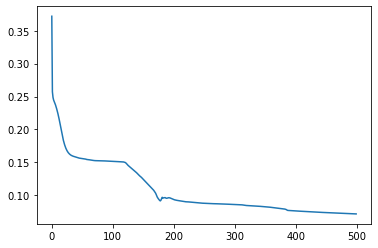

In [32]:
plt.plot(errors)

In [69]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test,0.0001,params,training=False)

In [70]:
y = np.where(y>= 0.5,1,0)

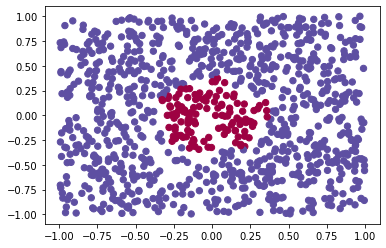

In [71]:
plt.scatter(data_test[:,0],data_test[:,1],c=y[:,0],s=40,cmap=plt.cm.Spectral)
plt.show()

### Malla de visualización

In [72]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [74]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

<ipython-input-75-2491cc3b5bec>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')


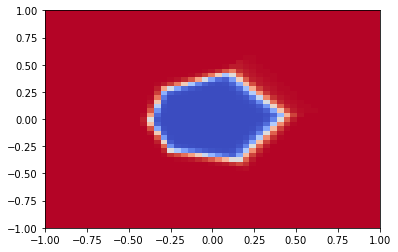

In [75]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')

## Data: Train, validation,test
Se recomienda en machine learning dividir tu set de datos en 3, para entrenar, validar y testear.

Se usa el set de entrenamiento para entrenar el modelo, el modelo entrenado se evalua con el test de validación que nos permite ajustar hiperparametros y una vez haya terminado este ciclo de iteraciones, se evalua el modelo con datos que jamas han sido vistos por el con el set de testeo.


### Problema de clasificación Binaria.


In [38]:
import numpy as np
import keras
from keras.datasets import imdb
from keras import models, layers,optimizers

In [39]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [40]:
word_index = imdb.get_word_index()

In [41]:
word_index = dict([(value,key) for key,value in word_index.items()])

In [42]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [43]:
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

Las redes neuronales solamente reciben tensores, numeros de coma flotante, por tanto, se debe hacer la transformación de los datos.

1. El primer paso es hacer un one_hot_encoding lo que resulta en un vector de palabras.

In [44]:
def vectorizar(sequences, dim=10000):
    '''
    se genera un matriz de palabras representadas con ceros y unos
    se inicializa la matriz con la cantidad de datos de la secuencia
    y de la dimensión de caracteristicas o variables que va a recibir
    '''
    results = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1
        
    return results

In [45]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [46]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Función de perdida para clasificación Binaria
Binary_cross_entropy es la función recomendada para clasificación binaria. 

El overfitting se evalua con la función de perdida tambien, no solamente con la metrica de accuracy


In [47]:
model =models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [48]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [49]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/10
30/30 [==============================] - 3s 103ms/step - loss: 0.5401 - accuracy: 0.7861 - val_loss: 0.4151 - val_accuracy: 0.8683
Epoch 2/10
30/30 [==============================] - 1s 22ms/step - loss: 0.3304 - accuracy: 0.8991 - val_loss: 0.3186 - val_accuracy: 0.8829
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 0.2408 - accuracy: 0.9199 - val_loss: 0.2932 - val_accuracy: 0.8841
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1851 - accuracy: 0.9413 - val_loss: 0.2909 - val_accuracy: 0.8824
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1518 - accuracy: 0.9507 - val_loss: 0.2802 - val_accuracy: 0.8875
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1238 - accuracy: 0.9631 - val_loss: 0.2902 - val_accuracy: 0.8864
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1021 - accuracy: 0.9691 - val_loss: 0.3063 - val_accuracy: 0.8853
Epoch 8/10
3

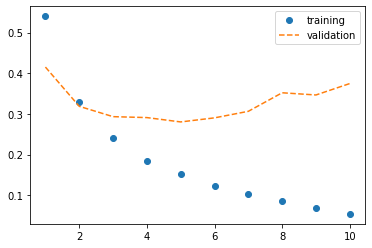

In [51]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch= range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,'o',label='training')
plt.plot(epoch,val_loss_values,'--',label='validation')
plt.legend()
plt.show()

In [52]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4079 - accuracy: 0.8645: 0s


[0.4079333245754242, 0.8645200133323669]

## Regularización
Suma pesos a la función de costo, castigando los pesos de la neurona de nuestra red.

L1 funciona con los valores absolutos de los pesos de la neurona
L2 funciona con los valores elevados al cuadrado de los pesos de la neurona.

Se ajusta otro hiperparametro lambda, a un menor lambda menor regularización, por tanto, se recomienda empezar con valores bajos.

## Dropout
Se apaga un porcentaje de la red de manera aleatoria para que una capa no dependa tanto de otra y haya un entrenamiento con neuronas diferentes dependiendo de la cantidad de neuronas que se pague. reduce el overfitting

![](./regu.PNG)

In [53]:
model2 =models.Sequential()
model2.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(4,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history2 = model2.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6553 - accuracy: 0.5097 - val_loss: 0.6246 - val_accuracy: 0.5154
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5853 - accuracy: 0.6298 - val_loss: 0.5264 - val_accuracy: 0.7846
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4290 - accuracy: 0.8737 - val_loss: 0.3992 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3359 - accuracy: 0.9038 - val_loss: 0.3449 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2776 - accuracy: 0.9182 - val_loss: 0.3101 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2356 - accuracy: 0.9296 - val_loss: 0.2926 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2039 - accuracy: 0.9371 - val_loss: 0.2796 - val_accuracy: 0.8906
Epoch 8/20
30

In [54]:
from keras import regularizers 

In [55]:
model3 =models.Sequential()
model3.add(layers.Dense(16,activation='relu',input_shape=(10000,), kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(16,activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history3 = model3.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5566 - accuracy: 0.7873 - val_loss: 0.4365 - val_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3613 - accuracy: 0.8979 - val_loss: 0.3586 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2895 - accuracy: 0.9201 - val_loss: 0.3330 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2566 - accuracy: 0.9302 - val_loss: 0.3283 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2352 - accuracy: 0.9392 - val_loss: 0.3324 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2181 - accuracy: 0.9469 - val_loss: 0.3384 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2063 - accuracy: 0.9508 - val_loss: 0.3890 - val_accuracy: 0.8723
Epoch 8/20
30

In [56]:
model4 =models.Sequential()
model4.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16,activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1,activation='sigmoid'))

model4.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history4 = model4.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6376 - accuracy: 0.6331 - val_loss: 0.5409 - val_accuracy: 0.7680
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5153 - accuracy: 0.7563 - val_loss: 0.4280 - val_accuracy: 0.8511
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4245 - accuracy: 0.8294 - val_loss: 0.3430 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3559 - accuracy: 0.8693 - val_loss: 0.2996 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3168 - accuracy: 0.8929 - val_loss: 0.2850 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2727 - accuracy: 0.9111 - val_loss: 0.2801 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2380 - accuracy: 0.9281 - val_loss: 0.2937 - val_accuracy: 0.8874
Epoch 8/20
30

In [96]:
from keras.datasets import reuters

In [97]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=1000)

In [98]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
None
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
None
None
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
None
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [99]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

#### Transformación de datos a tensores
Es importante que para la clasificación multiple, las posibles categorias se representen tambien en tensores y no como numeros escalares como actualmente se muestra en el ejemplo, para crear un tensor o un one hot encoding se puede utilizar una función de keras. 

In [100]:
tran_data.shape

(8982,)

In [101]:
## tensor o vector de representación
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [102]:
train_labels.shape

(8982,)

#### Activación para clasificación multiple
La función de activación perfecta para determinar la probabilidad de cada una de las posibles categorias es softmax ya que una sigmoide clasifica con probabilidad en casos binarios

In [103]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [104]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [105]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [106]:
y_train.shape

(8982, 46)

In [107]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 3.0721 - accuracy: 0.4178 - val_loss: 2.1723 - val_accuracy: 0.5890
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.8120 - accuracy: 0.6447 - val_loss: 1.5652 - val_accuracy: 0.6740
Epoch 3/9
16/16 [==============================] - 0s 27ms/step - loss: 1.4173 - accuracy: 0.7046 - val_loss: 1.3477 - val_accuracy: 0.6990
Epoch 4/9
16/16 [==============================] - 0s 27ms/step - loss: 1.2309 - accuracy: 0.7354 - val_loss: 1.2436 - val_accuracy: 0.7270
Epoch 5/9
16/16 [==============================] - 0s 27ms/step - loss: 1.0995 - accuracy: 0.7633 - val_loss: 1.1425 - val_accuracy: 0.7430
Epoch 6/9
16/16 [==============================] - 0s 29ms/step - loss: 1.0103 - accuracy: 0.7785 - val_loss: 1.0821 - val_accuracy: 0.7630
Epoch 7/9
16/16 [==============================] - 0s 27ms/step - loss: 0.9241 - accuracy: 0.7975 - val_loss: 1.0440 - val_accuracy: 0.7660
Epoch 8/9
16/16 [===

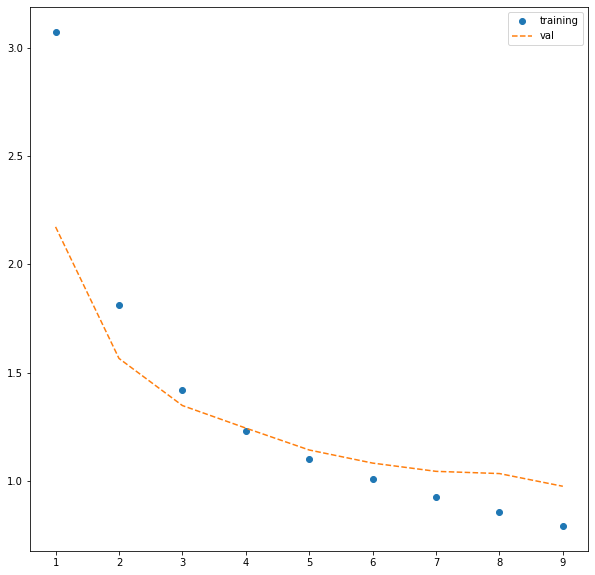

In [108]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [109]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.7556


[1.0487130880355835, 0.7555654644966125]

In [110]:
predictions = model.predict(x_test)

In [111]:
predictions[0]

array([6.4813466e-05, 1.5654307e-04, 1.0759684e-04, 9.4357383e-01,
       3.9784793e-02, 5.4467917e-05, 3.8854976e-04, 1.6357189e-04,
       5.6448001e-03, 1.1666112e-04, 2.9955025e-05, 7.1122800e-04,
       1.4538053e-04, 4.3499537e-04, 6.4180058e-05, 3.8451573e-05,
       2.9396522e-03, 4.9976161e-04, 1.1900733e-04, 1.7216192e-04,
       9.0958469e-04, 3.0001299e-04, 1.6116023e-06, 6.6238764e-04,
       5.6686087e-05, 7.8832713e-04, 7.5628057e-05, 4.7435460e-05,
       3.8138282e-04, 1.0622694e-04, 8.9195979e-05, 2.2516827e-04,
       3.0466761e-05, 2.2598759e-05, 3.6213454e-04, 5.1127921e-05,
       1.3498988e-04, 9.3622766e-06, 7.4939540e-05, 2.0535737e-04,
       3.4337583e-05, 1.4203406e-04, 1.9287205e-05, 2.2755312e-05,
       1.6740387e-05, 2.0128640e-05], dtype=float32)

In [113]:
np.sum(predictions[0])

1.0000004

#### Sacar la predicción con probabilidad mas alta.

In [114]:
np.argmax(predictions[0])

3

### Problemas de regresión

In [116]:
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()


57344/57026 [==============================] - 0s 0us/step


In [117]:
train_data.shape

(404, 13)

In [125]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data/std


In [126]:
test_data = test_data - mean
test_data = test_data / std

### k-fold validation

In [148]:
def build_model_regression(lr_var,input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(lr=lr_var),loss='mse',metrics=['mae'])
    
    return model

In [149]:
k = 4

num_val_samples = int(len(train_data)/4)
num_epochs = 85
all_history = []

In [150]:
for i in range(k):
    print("Fold: ", i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_labels[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
        ],axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i*num_val_samples],
        train_labels[(i+1)*num_val_samples:]
        ],axis=0)
    
    model = build_model_regression(0.001,13)
    history = model.fit(partial_train_data,partial_train_targets,
                       epochs=num_epochs,
                       batch_size = 16,
                       validation_data=(val_data,val_targets),
                       verbose=0)
    all_history.append(history.history['val_mae'])

Fold:  0
Fold:  1
Fold:  2
Fold:  3


In [133]:
import pandas as pd

In [152]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [153]:
len(all_mae_avg)

85

### Siempre Graficar los resultados
Esto permite identificar en que punto de convergencia los Hiperparametros parecen ser optimos.

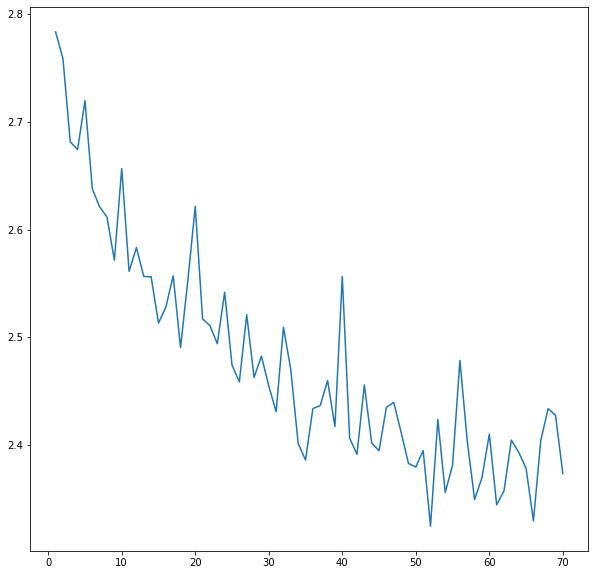

In [154]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1),all_mae_avg[15:])
plt.show()

In [155]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 21.3767 - mae: 2.9048


[21.376693725585938, 2.904841899871826]